## Task Description

In this exercise, we will implement a perceptron to classify iris plants using the classic Iris dataset. The Iris dataset contains three classes of iris plants with 50 instances each. Each instance has four attributes: sepal length, sepal width, petal length, and petal width. The goal is to classify these plants into their respective classes.

## Problem Statement

$$Problem 1$$
1. **Dataset Preparation**:
    - Choose two classes from the Iris dataset that are separable linearly. This is for our understanding of the algorithm working.
    - Select two features for classification. This for visulaization purposes again for our understanding and not a restriction on perceptron algorithm
    - Preprocess the data using Pandas:
        - Remove the class not used for classification.
        - Drop the features not used for classification.
        - Assign binary labels (0 and 1) to the selected classes.

2. **Perceptron Implementation**:
    - Implement a perceptron with two inputs and one output using the unit step activation function.
    - Train the perceptron on the prepared dataset.

3. **Visualization**:
    - Implement a plot function using `matplotlib` to visualize the classified data and the decision boundary.

4. **Weight Initialization**:
    - Experiment with different initial weight values to achieve optimal separation.

$$Problem 2$$
5. **Extend the model to multi-class problem with multiple features**:
    - Adapt the percptron model to classify all three classes same dataset, using one-vs-all approach.
    - Visualize the results.
    - Think/comment and argue a strategy on the following questions:
    - How do the class disparity in the samples affect the results? For example when using the 1-vs-all approach one class will have 50 samples but the other class will have 100 sample. What would be the consequences of working with such skew sample favoring one class over others.
    - Can you think of any strategies to counter this problem?


6. **Studying the effect of scaling**
    - Let enumerate them with $x_i$, $i \in \{1,2,3,4\}$ for e.g. say $x_1$ is sepal length, $x_2$ is sepal width so on.
    - As you have seen the range of each features have various ranges. Retrain the model using:
    - Normalizing each feature $i$ using $\hat{x}_i = \frac{x_i - max(x_i)}{max(x_i) - min(x_i)}$, $i \in \{1,2,3,4\}$, 
    - Standardizing each features $i$ using $\hat{x}_i = \frac{x_i - \mu_{x_i}}{\sigma_{x_i}}$ , $i \in \{1,2,3,4\}$
    - How does the classification of these retrained models compare to the model trained on unscaled data.

Figure 1 shows pairwise relationships in the given dataset.

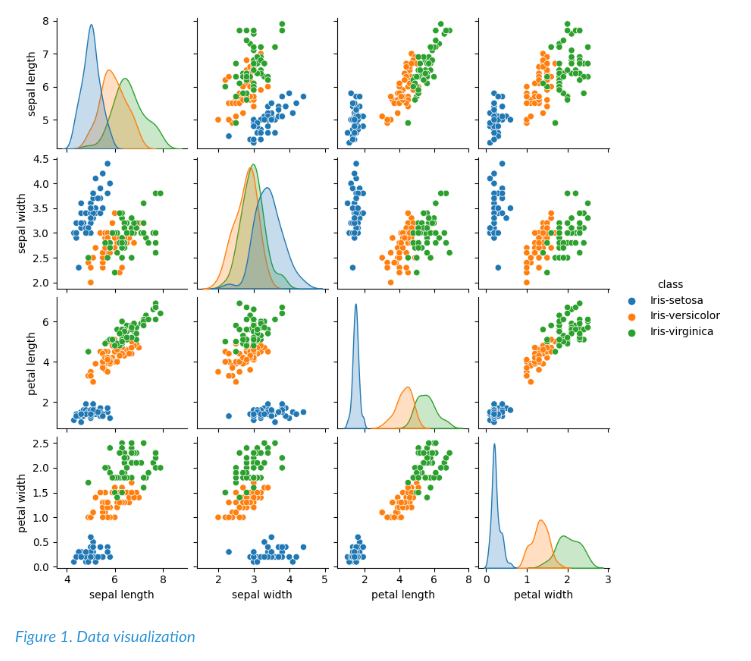

### Step 1: Dataset Preparation

First, we load the Iris dataset and select two classes and two features for our perceptron model.
We'll use Pandas to load the dataset from the file you provided (`iris.csv`).


In [ ]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# a. Read the data
dataset = pd.read_csv('iris.csv', header=None, names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])

dataset.info()
dataset.head()

There are three classes available. The diagonal shows the class probability distrubution. The off-diagonal blocks show the class distribution along the selected two features. For example, the first row third column shows the scatter plot of classes along the `sepal length`, and `petal length`. Choose two classes and two features based on the plot above so that these classes are separable by a linear classifier (points that can separated by a straight line).

In [ ]:
# Select you two classes to retain and the class to drop-out
class1 = 'Iris-setosa'
class2 = 'Iris-versicolor'
drop_class = 'Iris-virginica'

# b. Remove the class that you will not classify
dataset = dataset.drop(index=dataset.index[dataset['class'] == drop_class])


dataset.info()
dataset.head()


## We drop other two features here.

In [ ]:
# our two chosen features
feature1 = 'sepal length' # 'sepal width'
feature2 = 'petal length' # 'petal width'
feature3 = 'sepal width'
feature4 = 'petal width'

# c. Similary, remove the two columns that you will not use for classification
binary_dataset = dataset.drop(columns=[feature3, feature4])


binary_dataset.info()
binary_dataset.head()

## Assign numerical class labels

In [ ]:
# d. Assign 0 and 1 to the remaining classes which are 'Iris-setosa' and 'Iris-versicolor' we chose before
binary_dataset.loc[binary_dataset['class'] == class1, 'class'] = 0
binary_dataset.loc[binary_dataset['class'] == class2, 'class'] = 1

binary_dataset.info()
binary_dataset.head()

Let's implement perceptron classifier with 2 inputs, 1 output and the unit step activation function as it is shown in Figure 2  

![lecture_slides/neuron.jpg](lecture_slides/neuron.jpg) <br>
Figure 2. Perceptron scheme

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=666):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w1 = 0  # weight for input 1
        self.w2 = 0  # weight for input 2
        self.w3 = 0  # weight for constant '-1'

    def step_function(self, x):
        # unit step activation function as it is shown in Figure 2
        return 1 if x >= 0 else 0

    def predict_single(self, x1, x2): 
        # prediction for a single data point
        # weighted sum with -1 input too
        return

    def fit(self, X, y):
        # training the perceptron
        for _ in range(self.n_iterations):
            # for each data point in the dataset
            for idx, (x1, x2) in enumerate(X):
                pass

## Here is an implementationto visualize the classified data and the decision boundary


In [ ]:
def plot_decision_boundary(X, y, perceptron):
    plt.figure(figsize=(10,8))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')
    
    x1 = np.array([X[:, 0].min(), X[:, 0].max()])
    m = -perceptron.w1 / perceptron.w2 # slope of the decision boundary
    b = perceptron.w3 / perceptron.w2 # intercept of the decision boundary
    x2 = m * x1 + b # equation of the decision boundary
    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    
    plt.xlabel('feat1_name')
    plt.ylabel('feat2_name')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

In [ ]:
# let's create the perceptron and train it
my_perceptron = Perceptron()

# let's train the perceptron with the binary dataset and our class labels
X = binary_dataset[[feature1, feature2]].values
y = binary_dataset['class'].values

my_perceptron.fit(X, y)

# and now let's check weights and bias that we got from training
print(my_perceptron.w1, my_perceptron.w2, my_perceptron.w3)

In [ ]:
# and now let's plot the decision boundary
plot_decision_boundary(X, y, my_perceptron)

## Try to solve Problem 2, using/modifying the steps in Problem1. Comment the code

In [ ]:
# we need to update the class to initialize weights randomly
class Perceptron_all_vs_one:
    def __init__(self, learning_rate=0.01, n_iterations=666):
        pass

    def step_function(self, x):
        # unit step activation function as it is shown in Figure 2
        return 1 if x >= 0 else 0

    def predict_single(self, x1, x2): 
        pass

    def fit(self, X, y):
        pass


**Extend the model to multi-class problem with multiple features**:
    - Adapt the percptron model to classify all three classes same dataset, using one-vs-all approach.
    - Visualize the results.
    - Think/comment and argue a strategy on the following questions:
    - How do the class disparity in the samples affect the results? For example when using the 1-vs-all approach one class will have 50 samples but the other class will have 100 sample. What would be the consequences of working with such skew sample favoring one class over others.
    - Can you think of any strategies to counter this problem?




6. **Studying the effect of scaling**
    - Let enumerate them with $x_i$, $i \in \{1,2,3,4\}$ for e.g. say $x_1$ is sepal length, $x_2$ is sepal width so on.
    - As you have seen the range of each features have various ranges. Retrain the model using:
    - Normalizing each feature $i$ using $\hat{x}_i = \frac{x_i - max(x_i)}{max(x_i) - min(x_i)}$, $i \in \{1,2,3,4\}$, 
    - Standardizing each features $i$ using $\hat{x}_i = \frac{x_i - \mu_{x_i}}{\sigma_{x_i}}$ , $i \in \{1,2,3,4\}$
    - How does the classification of these retrained models compare to the model trained on unscaled data.